### Imports

In [45]:
import pandas as pd
pd.set_option('display.max_columns', 1000)
#import pycaret
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datacleaner import autoclean
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing


### Loading data

O dataset é divido em dois pois o GitHub não aceita arquivos com mais de 100MB, então nessa etapa acontece a junção dos dois arquivos em apenas um.

In [46]:
df_train1= pd.read_csv('../Dados/train1.csv')
df_train2= pd.read_csv('../Dados/train2.csv')
df_train = pd.concat([df_train1,df_train2])

In [47]:
df_train

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,ID,MF,NU_ANO,CONCEITO
0,3,F,1,1,1,2,2,1.0,0,4322707.0,Vera Cruz,43.0,RS,2.0,1.0,1.0,4316808,Santa Cruz do Sul,43,RS,1,1,1,1,912.0,882.0,891.0,901.0,595.6,503.4,498.0,725.3,CAEBACDBECEABABBEAEBCDCCDABCDABCBADCCCCDBCBCD,EDDAEDCBEACBCDAEEBBAADCDBEEEEEEEEEEEEEEEEEEEE,ACCAE99999DEEAEDAADCDCEBBDEADDDAAEDBDEAEECEEEE...,DCCDEABCDDCCDECDCBCCEAADDBEECDAAEDEADDCBDEACD,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,200.0,120.0,140.0,140.0,720.0,C,E,A,A,4.0,H,A,C,D,B,A,B,C,B,A,A,A,B,C,A,A,E,A,B,B,2464336,608.46,2020,C
1,4,M,1,3,1,2,2,1.0,0,3303500.0,Nova Igua�u,33.0,RJ,2.0,1.0,1.0,3303500,Nova Igua�u,33,RJ,1,1,1,1,912.0,882.0,891.0,901.0,443.6,477.3,418.4,475.1,DCABEDEABCCDDECEEBDCADCDAABEBEBDDEBBCABDBCCAE,EBAEDDECEAABDBCCABBBAEADBEEBDEABEACCAEEDBAEBA,99999AAAADDCBDEEABAEBADAEDBDEADBCECBEEAACBAAAC...,EDBDEECABDEDCCBCCAEDABDEBABEDCBACCDAEBADBDAEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,6.0,0.0,0.0,0.0,0.0,0.0,0.0,E,E,D,B,2.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,B,B,A,A,A,1983774,362.88,2020,E
2,3,M,1,3,1,2,2,1.0,0,2408102.0,Natal,24.0,RN,1.0,1.0,1.0,2408102,Natal,24,RN,1,1,1,1,910.0,879.0,889.0,900.0,594.9,601.2,590.4,702.6,ABAACDCBCEDEACDCECCAABDBAAECCBABABBCBDAAACBAE,BAECDEBBBEEDEBBAEAEABECCCAEABCEABAEABAABADDDA,CABDC99999BDCDEADEBEBECBDABBCECCBCCACCBDDAEABD...,BDCBEBCEAEBDEDBDBCADAAEDBBEBBBDCCCDDCDEBABDBB,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,160.0,200.0,160.0,200.0,200.0,920.0,D,C,B,B,4.0,D,A,C,C,A,A,B,B,B,A,B,A,A,C,A,A,E,A,B,B,1440554,681.82,2020,C
3,2,M,1,3,1,2,2,1.0,0,2306405.0,Itapipoca,23.0,CE,2.0,2.0,1.0,2306405,Itapipoca,23,CE,1,1,1,1,909.0,881.0,892.0,899.0,478.1,487.3,519.7,405.9,EEDDCEEBADDABDEEEABAAEDCECCEECECDCBDABEEBBACE,BBEBCABCDBCBDBCBADBBECEDCABDBABAEBCBAABDACABB,99999AADDDCDCCDBDDABAABACCECBBBDBBAACBEAAECBAE...,BEDCEDAAEDDEDEBBEADBECCBEDCDAEEDDACBCCEEBDDDC,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,80.0,100.0,0.0,420.0,B,C,A,A,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,2522015,462.20,2020,E
4,3,F,1,1,1,2,2,1.0,0,3520509.0,Indaiatuba,35.0,SP,2.0,1.0,1.0,3520509,Indaiatuba,35,SP,1,1,1,1,909.0,881.0,892.0,899.0,364.8,415.9,532.7,580.2,DBDCEDEEDCABCADADCDEEABCBCDAEBECABDEBBDCCDBEA,BDCBDABBAAEAECDCEBEBECBAADBAADACEDCDBBECADBAA,ABADC99999CDABDDEEDDECADABBBDDDBEEAECBEBABCDEC...,EADECBDDCDDCAEEADBCCAADCDCBDBCACBDEABACDABCDB,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,120.0,120.0,160.0,640.0,D,E,D,C,3.0,D,A,B,B,A,B,B,B,B,A,B,A,A,B,A,A,D,A,A,B,3274277,506.72,2020,D
...,...,.

In [48]:
df_test= pd.read_csv('../Dados//test.csv')



###Análise Exploratória

In [49]:
df_train.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC',
       'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC',
       'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA',
       'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH',
       'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q01

In [50]:
df_train['SG_UF_ESC'].value_counts()

SP    39275
CE    20340
MG    17468
RJ    15192
BA    11885
PR    11621
PE    10149
RS     9680
GO     8351
PA     7198
SC     6922
MA     5703
AM     5398
DF     4954
ES     4662
PB     4473
PI     3921
RN     3714
MT     3282
AL     3045
MS     2700
SE     2305
RO     1649
TO     1579
AC      760
AP      736
RR      429
Name: SG_UF_ESC, dtype: int64

In [51]:
df_train[df_train['NU_NOTA_REDACAO']>=900]['MF'].mean()

676.1600191639717

In [52]:
def piechart(x):
  fig = px.pie(x, values=x['SG_UF_ESC'].value_counts(), names=x['SG_UF_ESC'].value_counts().index, title='distribuição por estado')
  fig.show()

In [53]:
ricos = df_train[df_train['Q006']=='Q']#aqui selecionei as pessoas cuja renda familiar é superior a R$22.000,00
pobres = df_train[(df_train['Q006']=='B') | (df_train['Q006']=='A')]#aqui estou selecionando apenas as pessoas que responderam que a renda familiar é igual ou inferior a R$1.100,00


In [54]:
piechart(ricos)

In [55]:
piechart(pobres)

In [56]:
fig = px.bar(df_train, x=df_train['SG_UF_ESC'].value_counts().index, y=df_train['SG_UF_ESC'].value_counts(), color= df_train['SG_UF_ESC'].value_counts().index)
fig.show()

#### Diferença de médias entre pobres e ricos


In [57]:
pobres['MF'].mean()

484.07966247027593

In [58]:
ricos['MF'].mean()

646.0140165352817

In [59]:
def bargraph(df, xlabel, ylabel):
  fig = px.bar(x=df.keys(), y=df.values(), color= df.keys(), labels={'x':xlabel, 'y': ylabel})
  fig.show()

In [60]:
#pegando a media de cada estado
medias_estado = {}
lista_de_estados= df_train['SG_UF_ESC'].unique()
for i in lista_de_estados:
  media = df_train[df_train['SG_UF_ESC']==i]['MF'].mean()
  medias_estado[i]=media

In [61]:
medias =sorted(medias_estado.items(), key=lambda x:x[1])

In [62]:
medias = dict(medias)

In [63]:
def bargraph(df, xlabel, ylabel):
  fig = px.bar(x=df.keys(), y=df.values(), color= df.keys(), labels={'x':xlabel, 'y': ylabel})
  fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
  fig.show()

In [64]:
bargraph(medias, 'ESTADOS','NOTA ENEM')

#### Nota de matemática pela renda

Text(0.5, 1.0, 'Boxplot das notas pela renda')

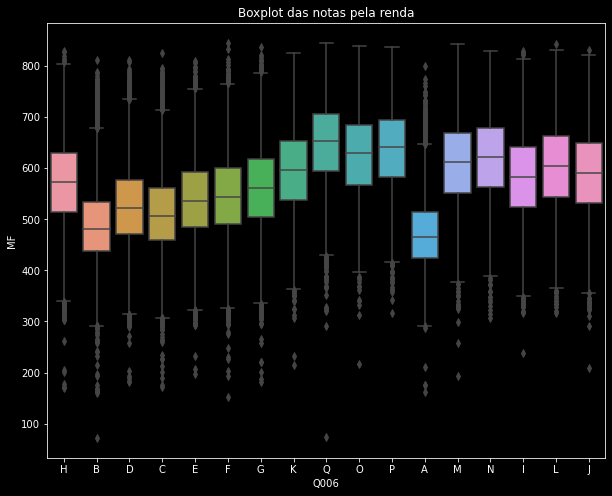

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.boxplot(x="Q006", y = "MF", data = df_train)
plt.title("Boxplot das notas pela renda")

In [66]:
df_train

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,ID,MF,NU_ANO,CONCEITO
0,3,F,1,1,1,2,2,1.0,0,4322707.0,Vera Cruz,43.0,RS,2.0,1.0,1.0,4316808,Santa Cruz do Sul,43,RS,1,1,1,1,912.0,882.0,891.0,901.0,595.6,503.4,498.0,725.3,CAEBACDBECEABABBEAEBCDCCDABCDABCBADCCCCDBCBCD,EDDAEDCBEACBCDAEEBBAADCDBEEEEEEEEEEEEEEEEEEEE,ACCAE99999DEEAEDAADCDCEBBDEADDDAAEDBDEAEECEEEE...,DCCDEABCDDCCDECDCBCCEAADDBEECDAAEDEADDCBDEACD,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,200.0,120.0,140.0,140.0,720.0,C,E,A,A,4.0,H,A,C,D,B,A,B,C,B,A,A,A,B,C,A,A,E,A,B,B,2464336,608.46,2020,C
1,4,M,1,3,1,2,2,1.0,0,3303500.0,Nova Igua�u,33.0,RJ,2.0,1.0,1.0,3303500,Nova Igua�u,33,RJ,1,1,1,1,912.0,882.0,891.0,901.0,443.6,477.3,418.4,475.1,DCABEDEABCCDDECEEBDCADCDAABEBEBDDEBBCABDBCCAE,EBAEDDECEAABDBCCABBBAEADBEEBDEABEACCAEEDBAEBA,99999AAAADDCBDEEABAEBADAEDBDEADBCECBEEAACBAAAC...,EDBDEECABDEDCCBCCAEDABDEBABEDCBACCDAEBADBDAEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,6.0,0.0,0.0,0.0,0.0,0.0,0.0,E,E,D,B,2.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,B,B,A,A,A,1983774,362.88,2020,E
2,3,M,1,3,1,2,2,1.0,0,2408102.0,Natal,24.0,RN,1.0,1.0,1.0,2408102,Natal,24,RN,1,1,1,1,910.0,879.0,889.0,900.0,594.9,601.2,590.4,702.6,ABAACDCBCEDEACDCECCAABDBAAECCBABABBCBDAAACBAE,BAECDEBBBEEDEBBAEAEABECCCAEABCEABAEABAABADDDA,CABDC99999BDCDEADEBEBECBDABBCECCBCCACCBDDAEABD...,BDCBEBCEAEBDEDBDBCADAAEDBBEBBBDCCCDDCDEBABDBB,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,160.0,200.0,160.0,200.0,200.0,920.0,D,C,B,B,4.0,D,A,C,C,A,A,B,B,B,A,B,A,A,C,A,A,E,A,B,B,1440554,681.82,2020,C
3,2,M,1,3,1,2,2,1.0,0,2306405.0,Itapipoca,23.0,CE,2.0,2.0,1.0,2306405,Itapipoca,23,CE,1,1,1,1,909.0,881.0,892.0,899.0,478.1,487.3,519.7,405.9,EEDDCEEBADDABDEEEABAAEDCECCEECECDCBDABEEBBACE,BBEBCABCDBCBDBCBADBBECEDCABDBABAEBCBAABDACABB,99999AADDDCDCCDBDDABAABACCECBBBDBBAACBEAAECBAE...,BEDCEDAAEDDEDEBBEADBECCBEDCDAEEDDACBCCEEBDDDC,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,80.0,100.0,0.0,420.0,B,C,A,A,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,2522015,462.20,2020,E
4,3,F,1,1,1,2,2,1.0,0,3520509.0,Indaiatuba,35.0,SP,2.0,1.0,1.0,3520509,Indaiatuba,35,SP,1,1,1,1,909.0,881.0,892.0,899.0,364.8,415.9,532.7,580.2,DBDCEDEEDCABCADADCDEEABCBCDAEBECABDEBBDCCDBEA,BDCBDABBAAEAECDCEBEBECBAADBAADACEDCDBBECADBAA,ABADC99999CDABDDEEDDECADABBBDDDBEEAECBEBABCDEC...,EADECBDDCDDCAEEADBCCAADCDCBDBCACBDEABACDABCDB,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,120.0,120.0,160.0,640.0,D,E,D,C,3.0,D,A,B,B,A,B,B,B,B,A,B,A,A,B,A,A,D,A,A,B,3274277,506.72,2020,D
...,...,.

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.lineplot(x="Renda per capita", y = "MF", data = df_train)
plt.title("Média final pela renda")
plt.savefig('media.png')

ValueError: Could not interpret value `Renda per capita` for parameter `x`

<Figure size 720x576 with 0 Axes>

#### Quantidade de pessoas que não possuem internet em casa

In [68]:
df_train['Q025'].value_counts()

B    193041
A     14350
Name: Q025, dtype: int64

DIFERENÇA DAS MEDIAS ENTRE QUEM NÃO TEM INTERNET 

In [69]:
media_sem_internet = df_train[df_train['Q025']=='A']['MF'].mean() # Sem internet

media_com_internet = df_train[df_train['Q025']=='B']['MF'].mean() # Com internet

diferenca_medias_internet = media_com_internet - media_sem_internet

diferenca_medias_internet

77.72288906489052

In [70]:
def media_coluna(coluna_aspas_duplas):  #Function para retornar média final das notas por determinada feature
  hashmap = {}
  valores_contados = df_train[coluna_aspas_duplas].value_counts()
  for i in valores_contados.index:
    nota = df_train[df_train[coluna_aspas_duplas] == i]['MF'].mean()
    hashmap[i] = nota
  return(sorted(hashmap.items(), key=lambda x:x[1]))

#### Quantidade de banheiros

In [71]:
media_coluna("Q008") # Coluna quantidade de banheiros na casa do candidato

[('A', 462.68896624472586),
 ('B', 511.12007244288),
 ('C', 556.7679811145126),
 ('D', 591.7491116359349),
 ('E', 620.4498171419968)]

In [72]:
media_coluna("Q003") # Profissão do pai

[('A', 486.67112038231033),
 ('F', 511.47652066319625),
 ('B', 515.2046763408371),
 ('C', 525.5521703985517),
 ('D', 572.6418818490985),
 ('E', 612.7672726480085)]

#### Escolaridade pai / mãe

In [73]:
media_coluna("Q001") # Escolaridade pai 

[('A', 472.2050315994167),
 ('B', 492.3944512168376),
 ('H', 504.21259173473055),
 ('C', 510.9886107091215),
 ('D', 520.9410763201172),
 ('E', 543.6046138279897),
 ('F', 590.2019978030029),
 ('G', 605.954037866718)]

In [74]:
media_coluna("Q002") # Escolaridade mãe

[('A', 461.3444486873506),
 ('B', 482.65254756115223),
 ('H', 485.42679552022923),
 ('C', 500.1422416107398),
 ('D', 509.40455272341757),
 ('E', 534.8842636632394),
 ('F', 578.4142021246093),
 ('G', 589.0135624540212)]

#### Pessoas por residência


In [75]:
pessoas_por_residencia = media_coluna("Q005")
pessoas_por_residencia = dict(pessoas_por_residencia)
bargraph(pessoas_por_residencia, 'estados', 'nota enem')

C:\Users\Thiago\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\Thiago\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\Thiago\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\User

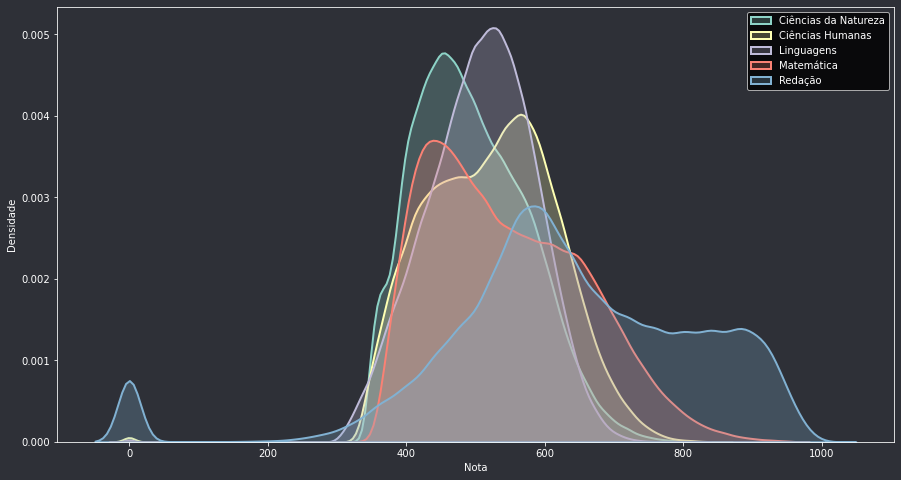

In [76]:
color = "#2E3037"
background_color = "Dark"
score_targets = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]
names = ["Ciências da Natureza", "Ciências Humanas", "Linguagens", "Matemática", "Redação"]
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 8))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

for i, col in enumerate(score_targets):
        sns.distplot(df_train[col], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 2}, 
                      label = names[i])

plt.legend(names)
plt.xlabel("Nota")
plt.ylabel("Densidade")
plt.savefig("Densidade_notas_por_disciplina.png")

#### Divisão de renda





In [77]:
renda_familiar = media_coluna("Q006") # Média por renda familiar

### Separando os dados em features e target

In [78]:
colunas_retirar = ['MF','TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH',
       'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'ID', 'CONCEITO', 'DESEMPENHO']

In [79]:
def Transformar_int(feature):
    df_train[feature] = df_train[feature].astype(int)

In [80]:
df_train['Q006']= df_train['Q006'].replace({"A": "0", "B":"1100","C":"1350","D":"2000","E":"2550","F":"3100",
                          "G":"3850","H":"4950","I":"5950","J":"7150","K":"8250","L":"9350",
                          "M":"10450","N":"12100","O":"14800","P":"18750","Q":"22000"}, inplace = False)
df_train['Q009']= df_train['Q009'].replace({"A": "0", "B":"1","C":"2","D":"3","E":"4"}, inplace = False)
df_train['Q024']= df_train['Q024'].replace({"A": "0", "B":"1","C":"2","D":"3","E":"4"}, inplace = False)
df_train['Q022']= df_train['Q022'].replace({"A": "0", "B":"1","C":"2","D":"3","E":"4"}, inplace = False)

Transformar_int('Q005')
Transformar_int('Q006')
Transformar_int('Q009')
Transformar_int('Q022')
Transformar_int('Q024')
df_train['Renda per capita'] = round(df_train['Q006']/df_train['Q005'])
#df_train['Pessoas por quarto']= round(df_train['Q005']/df_train['Q009'])
df_train['Computadores por pessoa']= round(df_train['Q024']/df_train['Q005'])
df_train['Celulares por pessoa']= round(df_train['Q022']/ df_train['Q005'])

In [81]:
df_test['Q006']= df_test['Q006'].replace({"A": "0", "B":"1100","C":"1350","D":"2000","E":"2550","F":"3100",
                          "G":"3850","H":"4950","I":"5950","J":"7150","K":"8250","L":"9350",
                          "M":"10450","N":"12100","O":"14800","P":"18750","Q":"22000"}, inplace = False)
df_test['Q009']= df_test['Q009'].replace({"A": "0", "B":"1","C":"2","D":"3","E":"4"}, inplace = False)
df_test['Q024']= df_test['Q024'].replace({"A": "0", "B":"1","C":"2","D":"3","E":"4"}, inplace = False)
df_test['Q022']= df_test['Q022'].replace({"A": "0", "B":"1","C":"2","D":"3","E":"4"}, inplace = False)
def Transformar_int_test(feature):
    df_test[feature] = df_test[feature].astype(int)
Transformar_int_test('Q005')
Transformar_int_test('Q006')
Transformar_int_test('Q009')
Transformar_int_test('Q022')
Transformar_int_test('Q024')
df_test['Renda per capita'] = round(df_test['Q006']/df_test['Q005'])
#df_test['Pessoas por quarto']= round(df_test['Q005']/df_test['Q009'])
df_test['Computadores por pessoa']= round(df_test['Q024']/df_test['Q005'])
df_test['Celulares por pessoa']= round(df_test['Q022']/ df_test['Q005'])

In [82]:
features = df_train.drop(colunas_retirar, axis=1)
features = autoclean(features)

KeyError: "['DESEMPENHO'] not found in axis"

In [83]:
target = df_train['DESEMPENHO']
#target = le.fit_transform(target)

KeyError: 'DESEMPENHO'

adicionando o conceito no test


In [84]:
lista = []

for i in df_test['MF']:
  if i <= 500.0:
    lista.append('E')
  if (i > 500) and (i<=600):
    lista.append('D')

  if (i > 600) and (i<= 700):
    lista.append('C')
  if (i > 700) and (i<= 800):
    lista.append('B')
  if i > 800:
    lista.append('A')


df_test['CONCEITO'] = lista    

dividindo o teste

In [85]:
x_test = df_test.drop(colunas_retirar, axis=1)
x_test = autoclean(x_test)
y_test = df_test['DESEMPENHO']

KeyError: "['DESEMPENHO'] not found in axis"

In [86]:
#label enconder
le = preprocessing.LabelEncoder()

x_test = autoclean(x_test)
y_test = le.fit_transform(df_test['DESEMPENHO'])
x_train = features
y_train = le.fit_transform(target)

NameError: name 'x_test' is not defined

### Standard scaler

In [87]:
#colocando os dados em escala
scaler = StandardScaler()

scaler.fit(x_train)
X2=scaler.transform(x_train)

NameError: name 'x_train' is not defined

In [88]:
#X3 = scaler.fit_transform(x_test)
scaler.fit(x_test)
X3=scaler.transform(x_test)

NameError: name 'x_test' is not defined

####Minmax

In [89]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
X_1= MinMaxScaler.fit_transform(x_train)
X_2= MinMaxScaler.fit_transform(x_test)

NameError: name 'x_train' is not defined

### Treinando o modelo

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
# split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=8)

# create a decision tree classifier object
#
#clf = DecisionTreeClassifier()
#clf = RandomForestClassifier(max_depth=2, random_state=0)
#
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
# train the model using the training sets
clf.fit(x_train, y_train)

# make predictions on the testing set
y_pred = clf.predict(x_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# print the accuracy of the model

#In this example, we are using the Iris dataset from scikit-learn library, splitting the data into training and testing sets, creating a DecisionTreeClassifier object, and training the model using the training data. Then, we are making predictions on the testing data and calculating the accuracy of the model. Finally, we are printing the accuracy of the model. You can replace the iris dataset with your own dataset to train a decision tree model.

print(classification_report(y_test, y_pred))

NameError: name 'x_train' is not defined

In [ ]:
precision = precision_score(y_test , y_pred, average = "macro")
recall = recall_score(y_test , y_pred, average = "macro")
print(f"Accuracy:{accuracy}, precision: {precision}, Recall: {recall} ")

0.5486037667919264


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
disp.plot(values_format='')

In [ ]:
testemodel = y_test.copy()
teste_modelo= pd.DataFrame(testemodel, columns= ['Real'])
#teste_modelo.drop(columns=['Class'], inplace=True)
teste_modelo['Previsão'] = y_pred
teste_modelo.head(50)

STD = 0.5014063589928219

In [91]:
d = {i:j for i,j in zip(features.columns, clf.feature_importances_)}
sorted(d.items(), key=lambda item: item[1], reverse=True)

NameError: name 'features' is not defined

### testes

In [113]:
x_train

NameError: name 'x_train' is not defined

In [105]:
variaveis_manter = ['TP_COR_RACA', 'Q001', 'Q002', 'Q003', 'TP_SEXO', 'TP_ST_CONCLUSAO', 'CO_UF_ESC', 'TP_LINGUA', 'Q006', 'TP_ESCOLA']

In [106]:
df = df_train[df_train['TP_COR_RACA', 'Q001', 'Q002', 'Q003', 'TP_SEXO', 'TP_ST_CONCLUSAO', 'CO_UF_ESC', 'TP_LINGUA', 'Q006', 'TP_ESCOLA']]

KeyError: ('TP_COR_RACA', 'Q001', 'Q002', 'Q003', 'TP_SEXO', 'TP_ST_CONCLUSAO', 'CO_UF_ESC', 'TP_LINGUA', 'Q006', 'TP_ESCOLA')

In [107]:
df_train['MF'].mean()

539.7041164756423

In [108]:
lista = []
for i in df_train['MF']:
  if i < 540:
    lista.append(0)#'Baixo Desempenho'
  if i >=540:
    lista.append(1)#'Desempenho Razoavel'

In [109]:
df_train['DESEMPENHO'] = lista

In [110]:
lista = []
for i in df_test['MF']:
  if i < 540:
    lista.append(0)#'Baixo Desempenho'
  if i >=540:
    lista.append(1)#'Desempenho Razoavel'

In [111]:
df_test['DESEMPENHO'] = lista

In [112]:
df_train

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,ID,MF,NU_ANO,CONCEITO,Renda per capita,Computadores por pessoa,Celulares por pessoa,DESEMPENHO
0,3,F,1,1,1,2,2,1.0,0,4322707.0,Vera Cruz,43.0,RS,2.0,1.0,1.0,4316808,Santa Cruz do Sul,43,RS,1,1,1,1,912.0,882.0,891.0,901.0,595.6,503.4,498.0,725.3,CAEBACDBECEABABBEAEBCDCCDABCDABCBADCCCCDBCBCD,EDDAEDCBEACBCDAEEBBAADCDBEEEEEEEEEEEEEEEEEEEE,ACCAE99999DEEAEDAADCDCEBBDEADDDAAEDBDEAEECEEEE...,DCCDEABCDDCCDECDCBCCEAADDBEECDAAEDEADDCBDEACD,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,200.0,120.0,140.0,140.0,720.0,C,E,A,A,4,4950,A,C,3,B,A,B,C,B,A,A,A,B,C,A,A,4,A,1,B,2464336,608.46,2020,C,1238.0,0.0,1.0,1
1,4,M,1,3,1,2,2,1.0,0,3303500.0,Nova Igua�u,33.0,RJ,2.0,1.0,1.0,3303500,Nova Igua�u,33,RJ,1,1,1,1,912.0,882.0,891.0,901.0,443.6,477.3,418.4,475.1,DCABEDEABCCDDECEEBDCADCDAABEBEBDDEBBCABDBCCAE,EBAEDDECEAABDBCCABBBAEADBEEBDEABEACCAEEDBAEBA,99999AAAADDCBDEEABAEBADAEDBDEADBCECBEEAACBAAAC...,EDBDEECABDEDCCBCCAEDABDEBABEDCBACCDAEBADBDAEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,6.0,0.0,0.0,0.0,0.0,0.0,0.0,E,E,D,B,2,1100,A,B,2,A,A,B,A,A,A,A,A,A,B,A,B,1,A,0,A,1983774,362.88,2020,E,550.0,0.0,0.0,0
2,3,M,1,3,1,2,2,1.0,0,2408102.0,Natal,24.0,RN,1.0,1.0,1.0,2408102,Natal,24,RN,1,1,1,1,910.0,879.0,889.0,900.0,594.9,601.2,590.4,702.6,ABAACDCBCEDEACDCECCAABDBAAECCBABABBCBDAAACBAE,BAECDEBBBEEDEBBAEAEABECCCAEABCEABAEABAABADDDA,CABDC99999BDCDEADEBEBECBDABBCECCBCCACCBDDAEABD...,BDCBEBCEAEBDEDBDBCADAAEDBBEBBBDCCCDDCDEBABDBB,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,160.0,200.0,160.0,200.0,200.0,920.0,D,C,B,B,4,2000,A,C,2,A,A,B,B,B,A,B,A,A,C,A,A,4,A,1,B,1440554,681.82,2020,C,500.0,0.0,1.0,1
3,2,M,1,3,1,2,2,1.0,0,2306405.0,Itapipoca,23.0,CE,2.0,2.0,1.0,2306405,Itapipoca,23,CE,1,1,1,1,909.0,881.0,892.0,899.0,478.1,487.3,519.7,405.9,EEDDCEEBADDABDEEEABAAEDCECCEECECDCBDABEEBBACE,BBEBCABCDBCBDBCBADBBECEDCABDBABAEBCBAABDACABB,99999AADDDCDCCDBDDABAABACCECBBBDBBAACBEAAECBAE...,BEDCEDAAEDDEDEBBEADBECCBEDCDAEEDDACBCCEEBDDDC,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,80.0,100.0,0.0,420.0,B,C,A,A,3,1100,A,B,2,A,A,B,A,A,A,A,A,A,B,A,A,1,A,0,A,2522015,462.20,2020,E,367.0,0.0,0.0,0
4,3,F,1,1,1,2,2,1.0,0,3520509.0,Indaiatuba,35.0,SP,2.0,1.0,1.0,3520509,Indaiatuba,35,SP,1,1,1,1,909.0,881.0,892.0,899.0,364.8,415.9,532.7,580.2,DBDCEDEEDCABCADADCDEEABCBCDAEBECABDEBBDCCDBEA,BDCBDABBAAEAECDCEBEBECBAADBAADACEDCDBBECADBAA,ABADC99999CDABDDEEDDECADABBBDDDBEEAECBEBABCDEC...,EADECBDDCDDCAEEADBCCAADCDCBDBCACBDEABACDABCDB,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEA